In [1]:
# coding=gbk
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [2]:
import os
file_path = "C:/Users/wangr/Desktop/学校事务/读研/论文投稿相关/投稿AI会议/院士当选前后/实验数据/2015"
filelist = os.listdir(file_path)
xlsx_list = []
for i in filelist:
    i_new = i.split('.')
    i_new2 = i_new[0]
    xlsx_list.append(i_new2)


In [3]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=256,input_shape=(None,1),return_sequences=True))
    model.add(LSTM(units=256))
    #后接全连接层，直接输出单个值，故units为1
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    model.compile(loss='mse',optimizer='adam')
    return model

In [4]:
j = 0
for xlsx_item in xlsx_list:
    df = pd.read_csv(file_path+'/'+xlsx_item+'.csv',usecols=[3],nrows = 45,header = None)
    scaler_minmax = MinMaxScaler()
    data = scaler_minmax.fit_transform(df)
    infer_seq_length = 10
    d = []
    for i in range(data.shape[0]-infer_seq_length):
        d.append(data[i:i+infer_seq_length+1].tolist())
    d = np.array(d)
    split_rate = 0.9
    X_train, y_train = d[:int(d.shape[0]*split_rate),:-1], d[:int(d.shape[0]*split_rate),-1]
    model =create_model()
    model.fit(X_train, y_train, batch_size=20,epochs=100,validation_split=0.1)
    plt.plot(scaler_minmax.inverse_transform(d[:,-1]),'b',label='true data')
    plt.plot(scaler_minmax.inverse_transform(model.predict(d[:,:-1])),'r:',label='predict')
    plt.axvline(31)
    plt.legend()
    plt.xlabel('time',fontsize=16)
    plt.ylabel('influences',fontsize = 16)
    j = j+1
    plt.savefig(file_path+'/'+'citation_'+str(xlsx_item)+'.jpg')
    plt.close()





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 2s 79ms/step - loss: 0.0757 - val_loss: 0.0594
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0668 - val_loss: 0.0688
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0549 - val_loss: 0.1616
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.3094
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0512 - val_loss: 0.2773
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.2513
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.2500
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.2787
Epoch 9/100
27/27 [==============================] - 0s 5ms/step

27/27 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 4.3763
Epoch 49/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 4.6332
Epoch 50/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0207 - val_loss: 4.7979
Epoch 51/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 5.2257
Epoch 52/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 6.3231
Epoch 53/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 7.4616
Epoch 54/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 8.5738
Epoch 55/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 9.2118
Epoch 56/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0200 - val_loss: 8.4491
Epoch 57/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0195 - val_loss: 7.0691
Epoch 58/100


27/27 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 1.4869
Epoch 11/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.8161
Epoch 12/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0451 - val_loss: 0.4376
Epoch 13/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.1974
Epoch 14/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.1028
Epoch 15/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0625
Epoch 16/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0414 - val_loss: 0.0487
Epoch 17/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0404 - val_loss: 0.0504
Epoch 18/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0385 - val_loss: 0.0579
Epoch 19/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.0642
Epoch 20/100


27/27 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0036
Epoch 73/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0051
Epoch 74/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.0064
Epoch 75/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0356 - val_loss: 0.0062
Epoch 76/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.0047
Epoch 77/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0356 - val_loss: 0.0037
Epoch 78/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.0042
Epoch 79/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.0050
Epoch 80/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.0053
Epoch 81/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0049
Epoch 82/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0487 - val_loss: 0.0330
Epoch 35/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0487 - val_loss: 0.0446
Epoch 36/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0486 - val_loss: 0.0668
Epoch 37/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0480 - val_loss: 0.0887
Epoch 38/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0477 - val_loss: 0.1148
Epoch 39/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.1450
Epoch 40/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.1766
Epoch 41/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0471 - val_loss: 0.2074
Epoch 42/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0466 - val_loss: 0.2421
Epoch 43/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0469 - val_loss: 0.2874
Epoch 44/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.1412
Epoch 98/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.1414
Epoch 99/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.1409
Epoch 100/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.1392
Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 5s 202ms/step - loss: 0.1250 - val_loss: 0.5620
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1048 - val_loss: 0.3276
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0983 - val_loss: 0.1204
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0846 - val_loss: 0.0491
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.1202
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss:

Epoch 59/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0356 - val_loss: 0.0016
Epoch 60/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 5.5024e-04
Epoch 61/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0357 - val_loss: 8.0002e-05
Epoch 62/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 7.3439e-05
Epoch 63/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0356 - val_loss: 6.1594e-05
Epoch 64/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0356 - val_loss: 3.9292e-04
Epoch 65/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0356 - val_loss: 0.0013
Epoch 66/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0355 - val_loss: 0.0011
Epoch 67/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 4.0350e-04
Epoch 68/100
27/27 [==============================] - 0s 7ms/step - loss: 0

Epoch 40/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.0065
Epoch 41/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.0089
Epoch 42/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.0025
Epoch 43/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 7.9094e-04
Epoch 44/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 6.0926e-04
Epoch 45/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0282 - val_loss: 7.7935e-04
Epoch 46/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.0033
Epoch 47/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.0159
Epoch 48/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0338
Epoch 49/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0270 - val_l

27/27 [==============================] - 0s 5ms/step - loss: 0.0676 - val_loss: 0.0162
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0610 - val_loss: 0.1010
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0523 - val_loss: 0.0823
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.0834
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0542 - val_loss: 0.1329
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0491 - val_loss: 0.2658
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0502 - val_loss: 0.3353
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0507 - val_loss: 0.1828
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0492 - val_loss: 0.0670
Epoch 11/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0466 - val_loss: 0.0228
Epoch 12/100
27/27 [

Epoch 84/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0354 - val_loss: 0.0294
Epoch 85/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0354 - val_loss: 0.0294
Epoch 86/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0354 - val_loss: 0.0335
Epoch 87/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0393
Epoch 88/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0464
Epoch 89/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0524
Epoch 90/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0568
Epoch 91/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.0601
Epoch 92/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0351 - val_loss: 0.0604
Epoch 93/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0351 - val_loss: 0.06

27/27 [==============================] - 0s 6ms/step - loss: 0.0242 - val_loss: 0.0624
Epoch 47/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0617
Epoch 48/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0236 - val_loss: 0.0550
Epoch 49/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0235 - val_loss: 0.0446
Epoch 50/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0333
Epoch 51/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 52/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0221 - val_loss: 0.0135
Epoch 53/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.0068
Epoch 54/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.0027
Epoch 55/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 7.4805e-04
Epoch 56/

Epoch 27/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.9152
Epoch 28/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.9969
Epoch 29/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 1.0446
Epoch 30/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 1.0707
Epoch 31/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 1.0245
Epoch 32/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.9003
Epoch 33/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.8582
Epoch 34/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.9211
Epoch 35/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.9883
Epoch 36/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.9546


27/27 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0244
Epoch 91/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.0161
Epoch 92/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0104
Epoch 93/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0073
Epoch 94/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0067
Epoch 95/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0059 - val_loss: 0.0068
Epoch 96/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0087
Epoch 97/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0121
Epoch 98/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0141
Epoch 99/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0138
Epoch 100/100

Epoch 52/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.1034
Epoch 53/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.1231
Epoch 54/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.1456
Epoch 55/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.1413
Epoch 56/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.1159
Epoch 57/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0822
Epoch 58/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.0867
Epoch 59/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.1199
Epoch 60/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0233 - val_loss: 0.1069
Epoch 61/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0205 - val_loss: 0.0920


27/27 [==============================] - 0s 8ms/step - loss: 0.0430 - val_loss: 0.0263
Epoch 15/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0419 - val_loss: 0.0122
Epoch 16/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0053
Epoch 17/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0399 - val_loss: 0.0023
Epoch 18/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0013
Epoch 19/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0390 - val_loss: 0.0013
Epoch 20/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.0019
Epoch 21/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0381 - val_loss: 0.0033
Epoch 22/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.0055
Epoch 23/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0373 - val_loss: 0.0077
Epoch 24/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0194
Epoch 97/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0187
Epoch 98/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0175
Epoch 99/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0173
Epoch 100/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0174
Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 9s 315ms/step - loss: 0.0993 - val_loss: 0.0920
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0634 - val_loss: 0.0753
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0571 - val_loss: 0.3438
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0634 - val_loss: 0.3143
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss

27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0022
Epoch 58/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0016
Epoch 59/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0014
Epoch 60/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0012
Epoch 61/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0015
Epoch 62/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0021
Epoch 63/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0026
Epoch 64/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 0.0023
Epoch 65/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0014
Epoch 66/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 6.4078e-04
Epoch 67/

27/27 [==============================] - 0s 7ms/step - loss: 0.0400 - val_loss: 0.0592
Epoch 19/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0379 - val_loss: 0.0772
Epoch 20/100
27/27 [==============================] - ETA: 0s - loss: 0.048 - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0853
Epoch 21/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0693
Epoch 22/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 0.0529
Epoch 23/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.0369
Epoch 24/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0348 - val_loss: 0.0262
Epoch 25/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.0151
Epoch 26/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0332 - val_loss: 0.0067
Epoch 27/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0324 - val_lo

Epoch 100/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0119 - val_loss: 0.0039
Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 10s 374ms/step - loss: 0.0819 - val_loss: 0.3384
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0664 - val_loss: 0.1581
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0565 - val_loss: 0.0576
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0587 - val_loss: 0.0969
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.1929
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0408 - val_loss: 0.3042
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0373 - val_loss: 0.4837
Epoch 8/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.8615
Epoch 9/100
27/27 [==============================] - 0s 6ms/s

27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 61/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 62/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 63/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 64/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 65/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 66/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 67/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 68/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.2500
Epoch 69/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0

27/27 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 0.0038
Epoch 41/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 0.0036
Epoch 42/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0042
Epoch 43/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0050
Epoch 44/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0031
Epoch 45/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0359 - val_loss: 9.9378e-04
Epoch 46/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0362 - val_loss: 5.4457e-04
Epoch 47/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0361 - val_loss: 0.0011
Epoch 48/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0361 - val_loss: 0.0013
Epoch 49/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 7.5072e-04
E

Epoch 20/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.0560
Epoch 21/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0419 - val_loss: 0.0329
Epoch 22/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0412 - val_loss: 0.0164
Epoch 23/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0056
Epoch 24/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0012
Epoch 25/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0011
Epoch 26/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0015
Epoch 27/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0378 - val_loss: 0.0032
Epoch 28/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0049
Epoch 29/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0375 - val_loss: 0.0031


27/27 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.0175
Epoch 84/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0141
Epoch 85/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.0117
Epoch 86/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0196 - val_loss: 0.0106
Epoch 87/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.0110
Epoch 88/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.0132
Epoch 89/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0162
Epoch 90/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0169
Epoch 91/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.0160
Epoch 92/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0164
Epoch 93/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.1252
Epoch 46/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.1318
Epoch 47/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.1098
Epoch 48/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0942
Epoch 49/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0856
Epoch 50/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0889
Epoch 51/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.1115
Epoch 52/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.1146
Epoch 53/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0046 - val_loss: 0.0971
Epoch 54/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0708
Epoch 55/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 8/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 9/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 10/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 11/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 12/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 13/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 14/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 15/100
27/27 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 16/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0

Epoch 86/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 87/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 88/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 89/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 90/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 91/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 92/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 93/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 94/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - val_loss: 0.5787
Epoch 95/100
27/27 [==============================] - 0s 6ms/ste

Epoch 67/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 0.0038
Epoch 68/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.0022
Epoch 69/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0226 - val_loss: 0.0019
Epoch 70/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.0021
Epoch 71/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.0026
Epoch 72/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.0032
Epoch 73/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.0036
Epoch 74/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.0032
Epoch 75/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0220 - val_loss: 0.0026
Epoch 76/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.0022


27/27 [==============================] - 0s 7ms/step - loss: 0.0247 - val_loss: 0.0278
Epoch 30/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0246 - val_loss: 0.0125
Epoch 31/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0245 - val_loss: 0.0082
Epoch 32/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: 0.0073
Epoch 33/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.0075
Epoch 34/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0237 - val_loss: 0.0085
Epoch 35/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0234 - val_loss: 0.0113
Epoch 36/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0232 - val_loss: 0.0126
Epoch 37/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.0096
Epoch 38/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.0081
Epoch 39/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.2476
Epoch 93/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0177 - val_loss: 0.2258
Epoch 94/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.1898
Epoch 95/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.1436
Epoch 96/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0177 - val_loss: 0.1198
Epoch 97/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.1298
Epoch 98/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0179 - val_loss: 0.1632
Epoch 99/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.1988
Epoch 100/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.2276
Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 13s 476ms/step -

Epoch 54/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.1137
Epoch 55/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.1083
Epoch 56/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.0957
Epoch 57/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0174 - val_loss: 0.0791
Epoch 58/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0172 - val_loss: 0.0643
Epoch 59/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.0542
Epoch 60/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0456
Epoch 61/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0408
Epoch 62/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.0421
Epoch 63/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0415


27/27 [==============================] - 0s 5ms/step - loss: 0.0565 - val_loss: 0.0197
Epoch 17/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0557 - val_loss: 0.0051
Epoch 18/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.0042
Epoch 19/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.0090
Epoch 20/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0511 - val_loss: 0.0184
Epoch 21/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0494 - val_loss: 0.0337
Epoch 22/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0484 - val_loss: 0.0330
Epoch 23/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.0183
Epoch 24/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0463 - val_loss: 0.0135
Epoch 25/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0454 - val_loss: 0.0171
Epoch 26/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0317 - val_loss: 0.0479
Epoch 99/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0318 - val_loss: 0.0522
Epoch 100/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0317 - val_loss: 0.0495
Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 14s 517ms/step - loss: 0.1479 - val_loss: 0.3510
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.1169 - val_loss: 0.1035
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0979 - val_loss: 0.0653
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0878 - val_loss: 0.1809
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0752 - val_loss: 0.1728
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0691 - val_loss: 0.2370
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss:

27/27 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.0828
Epoch 61/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0827
Epoch 62/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.0754
Epoch 63/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0637
Epoch 64/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0565
Epoch 65/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0534
Epoch 66/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0539
Epoch 67/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0572
Epoch 68/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0608
Epoch 69/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0599
Epoch 70/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0488 - val_loss: 0.0175
Epoch 23/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.0172
Epoch 24/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0457 - val_loss: 0.0166
Epoch 25/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0450 - val_loss: 0.0153
Epoch 26/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0439 - val_loss: 0.0143
Epoch 27/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0432 - val_loss: 0.0166
Epoch 28/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0421 - val_loss: 0.0240
Epoch 29/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0411 - val_loss: 0.0312
Epoch 30/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0403 - val_loss: 0.0380
Epoch 31/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0394 - val_loss: 0.0453
Epoch 32/100


27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0238
Epoch 86/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0232
Epoch 87/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0226
Epoch 88/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0357 - val_loss: 0.0220
Epoch 89/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0357 - val_loss: 0.0216
Epoch 90/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.0212
Epoch 91/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.0209
Epoch 92/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0208
Epoch 93/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0207
Epoch 94/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0358 - val_loss: 0.0207
Epoch 95/100

27/27 [==============================] - 0s 6ms/step - loss: 0.0227 - val_loss: 0.1070
Epoch 48/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0225 - val_loss: 0.0648
Epoch 49/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0221 - val_loss: 0.0344
Epoch 50/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 0.0227
Epoch 51/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0221 - val_loss: 0.0244
Epoch 52/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0283
Epoch 53/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0372
Epoch 54/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0439
Epoch 55/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0389
Epoch 56/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0271
Epoch 57/100


In [46]:
# scaler_minmax = MinMaxScaler()
# data = scaler_minmax.fit_transform(df)
# infer_seq_length = 10

In [47]:
# d = []
# for i in range(data.shape[0]-infer_seq_length):
#     d.append(data[i:i+infer_seq_length+1].tolist())
# d = np.array(d)

In [48]:
# split_rate = 0.9
# X_train, y_train = d[:int(d.shape[0]*split_rate),:-1], d[:int(d.shape[0]*split_rate),-1]

In [49]:
# model =create_model()
# model.fit(X_train, y_train, batch_size=20,epochs=100,validation_split=0.1)

Train on 27 samples, validate on 4 samples
Epoch 1/100
27/27 [==============================] - 3s 107ms/step - loss: 0.1219 - val_loss: 0.0196
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.0570
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.0254
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0125
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0441 - val_loss: 0.0124
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.0208
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0377
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0420 - val_loss: 0.0403
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.0269
Epoch 10/100
27/27 [==============================] - 0s 4ms/ste

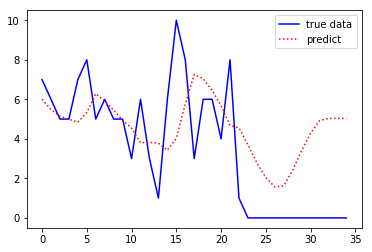

In [50]:
# plt.plot(scaler_minmax.inverse_transform(d[:,-1]),'b',label='true data')
# plt.plot(scaler_minmax.inverse_transform(model.predict(d[:,:-1])),'r:',label='predict')
# plt.legend()
# plt.savefig(file_path+'/'+'2008_'+str(11)+'.jpg')

In [1]:
# plt.plot()
# plt.plot(scaler_minmax.inverse_transform(d[int(len(d)*split_rate):,-1]),label='true data')
# plt.plot(scaler_minmax.inverse_transform(model.predict(d[int(len(d)*split_rate):,:-1])),'r:',label='predict')
# plt.legend()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.read_csv("C:/Users/wangr/ai_paper_data/test.csv", usecols=[0,1,2],nrows = 45)
df

,Year,Publications,Numbers of citation per article
0,1974,1,7.466667
1,1975,1,3.892424
2,1976,0,0.000000
3,1977,7,1.719481
4,1978,9,2.384131
5,1979,5,2.153885
6,1980,9,3.225188
7,1981,15,2.830251
8,1982,10,2.892274
9,1983,14,2.680730


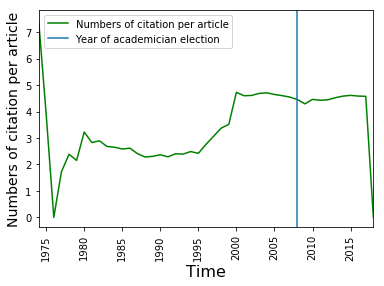

In [47]:

plt.plot(df['Year'],df['Numbers of citation per article'],'green')
plt.xlabel('Time',fontsize=16)
plt.ylabel('Numbers of citation per article',fontsize = 14)
plt.xlim(1974,2018)
plt.xticks(rotation=90)
plt.axvline(2008,label = 'Year of academician election')
plt.legend()
plt.savefig("C:/Users/wangr/ai_paper_data/citations.jpg")
plt.show()